In [2]:
import matplotlib.pyplot as plt
import numpy as np
import openmc
openmc.config["cross_sections"]="/home/f_z/endfb-vii.1-hdf5/cross_sections.xml"

In [3]:
#from IPython.display import Image
#Image(filename='fuel_rod_geo.png', width=950)

FileNotFoundError: [Errno 2] No such file or directory: 'fuel_rod_geo.png'

# Materials
To complete the fuel rod it is necessary to define a new material other than those used to define the fuel pellet: the `fuel blanket`. The top and bottom plugs are made by the cladding material.

## Fuel
The fuel is a mixture of UO$_2$ and PuO$_2$, with density of 10.3 and 11.5 g/cm$^3$, respectively. 

Uranium is 5.0% enriched in U235.
The Pu vector has the following atom fractions:
- Pu239: 94.0%
- Pu240:  5.0%
- Pu241:  1.0%

Finally, the weight fractions of UO$_2$ and PuO$_2$ in the mixture are 85.0% and 15.0%, respectively.

In [4]:
uo2 = openmc.Material()
uo2.add_element('U', 1.0, enrichment=5.0)
uo2.add_element('O', 2.0)
uo2.set_density('g/cm3', 10.3)

In [5]:
puo2 = openmc.Material()
puo2.add_nuclide('Pu239', 0.94)
puo2.add_nuclide('Pu240', 0.05)
puo2.add_nuclide('Pu241', 0.01)
puo2.add_nuclide('O16', 2.0)
puo2.set_density('g/cm3', 11.5)

In [6]:
mox = openmc.Material.mix_materials([uo2, puo2], [0.85, 0.15], 'wo')

In [9]:
#print(mox)

## Gap

The gap is filled by helium with a density of 0.0043 g/cm$^3$.

In [7]:
he4 = openmc.Material()
he4.add_nuclide('He4', 1)
he4.set_density('g/cm3', 0.0043)

In [11]:
#print(he4)

## Cladding
The cladding is a stainless steel with density of 7.55 g/cm$^3$ and the following composition by weight:
- C:  0.05%
- Ti: 0.50%
- Cr: 16.25%
- Mn: 2.00%
- Fe: 65.00%
- Ni: 14.00%
- Mo: 2.20%

In [8]:
ss = openmc.Material()
ss.add_element('C', 0.0005, 'wo')
ss.add_element('Ti', 0.005, 'wo')
ss.add_element('Cr', 0.1625, 'wo')
ss.add_element('Mn', 0.02, 'wo')
ss.add_element('Fe', 0.65, 'wo')
ss.add_element('Ni', 0.14, 'wo')
ss.add_element('Mo', 0.022, 'wo')
ss.set_density('g/cm3', 7.55)

In [13]:
#print(ss)

## Coolant
The coolant is sodium with density of 0.89 g/cm$^3$.

In [9]:
sodium = openmc.Material()
sodium.add_nuclide('Na23', 1.0)
sodium.set_density('g/cm3', 0.89)

## Fuel blanket

In [10]:
#from IPython.display import Image
#Image(filename='Blanket_pellet.png', width=500)

FileNotFoundError: [Errno 2] No such file or directory: 'Blanket_pellet.png'

In [11]:
uo2_blanket = openmc.Material()
uo2_blanket.add_element('U', 1.0, enrichment=0.5)
uo2_blanket.add_element('O', 2.0)
uo2_blanket.set_density('g/cm3', 10.35)
print(uo2_blanket)

Material
	ID             =	7
	Name           =	
	Temperature    =	None
	Density        =	10.35 [g/cm3]
	Volume         =	None [cm^3]
	Depletable     =	True
	S(a,b) Tables  
	Nuclides       
	U234           =	4.525948266244217e-05 [ao]
	U235           =	0.005063635023787973 [ao]
	U238           =	0.9948679116129957 [ao]
	U236           =	2.3193880553883135e-05 [ao]
	O16            =	1.999242     [ao]
	O17            =	0.000758     [ao]



All the materials are now defined and it remains to export them to the `materials.xml` file

In [13]:
materials = openmc.Materials([mox,he4,ss,sodium,uo2_blanket])
materials.export_to_xml()
!cat materials.xml

<?xml version='1.0' encoding='utf-8'?>
<materials>
  <material depletable="true" id="3" name="(0.85)-(0.15)">
    <density units="g/cm3" value="10.463780918727915"/>
    <nuclide ao="0.0001282472571742196" name="U234"/>
    <nuclide ao="0.014348314760367631" name="U235"/>
    <nuclide ao="0.26898324213162733" name="U238"/>
    <nuclide ao="6.572217332767625e-05" name="U236"/>
    <nuclide ao="0.6664517543177143" name="O16"/>
    <nuclide ao="0.00021491234895245265" name="O17"/>
    <nuclide ao="0.046819338590186325" name="Pu239"/>
    <nuclide ao="0.002490390350541826" name="Pu240"/>
    <nuclide ao="0.0004980780701083653" name="Pu241"/>
  </material>
  <material id="4">
    <density units="g/cm3" value="0.0043"/>
    <nuclide ao="1" name="He4"/>
  </material>
  <material id="5">
    <density units="g/cm3" value="7.55"/>
    <nuclide name="C0" wo="0.0005"/>
    <nuclide name="Ti46" wo="0.0003960047607888028"/>
    <nuclide name="Ti47" wo="0.000364889116159761"/>
    <nuclide name="Ti48

# Geometry
To create the geometry we will first define all the needed surfaces.

## Surfaces

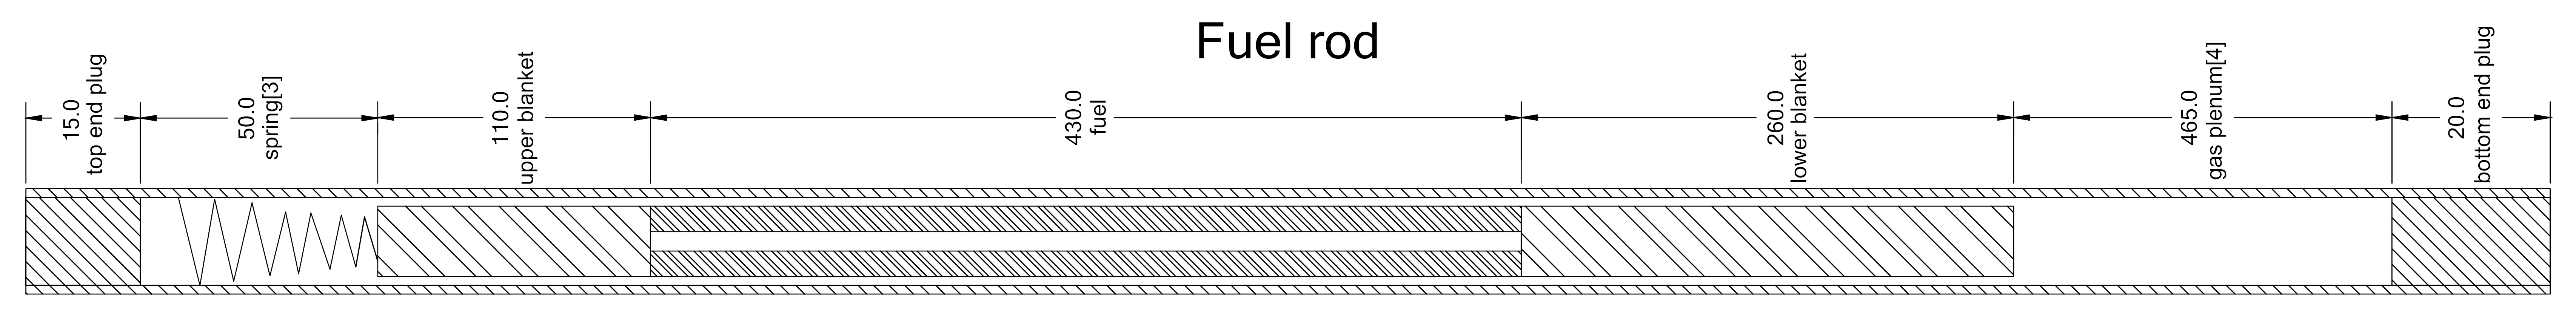

In [18]:
#from IPython.display import Image
#Image(filename='fuel_rod_geo.png', width=950)

In [14]:
rod_pitch = 0.715
# Cylindrical surfaces
ro_hole = openmc.ZCylinder(r=0.075)
ro_pellet = openmc.ZCylinder(r=0.26)
ro_gap = openmc.ZCylinder(r=0.275)
ro_clad = openmc.ZCylinder(r=0.3075)
# Top and bottom pellet planes
pellet_top = openmc.ZPlane(z0=0.5)
pellet_bottom = openmc.ZPlane(z0=-0.5)
# The pellet edges are rounded, however, for the sake of simplicity, we will replace them with a 45° bevel.
top_bevel = openmc.ZCone(z0=0.73, r2=1.0)
bottom_bevel = openmc.ZCone(z0=-0.73, r2=1.0)
#
# UO2 fuel bottom plane
fuel_bottom = openmc.ZPlane(z0=-21.5)
# UO2 fuel top plane
fuel_top = openmc.ZPlane(z0=21.5)
# Lower blanket bottom plane
lblanket_bottom = openmc.ZPlane(z0=-47.5)
# Upper blanket top plane
ublanket_top = openmc.ZPlane(z0=32.5)
# Lower gas plenum bottom plane
lgas_bottom = openmc.ZPlane(z0=-94.0)
# Upper gas plenum top plane
ugas_top = openmc.ZPlane(z0=37.5)
# Fuel rod top plane
rod_top = openmc.ZPlane(z0=39.0)
rod_top.boundary_type = 'reflective'
# Fuel rod bottom plane
rod_bottom = openmc.ZPlane(z0=-96.0)
rod_bottom.boundary_type = 'reflective'
# Fuel cell outer surface
edge = rod_pitch/2 * 1/np.sin(np.pi/3)
hex_cell = openmc.model.HexagonalPrism(edge_length=edge,orientation='x',boundary_type='reflective')

## Cells
The fuel rod will be created filling the whole cladding with suitable universes. Let's start defining the universe of the fuel pellet stack.

In [15]:
# Fuel hole
fuel_hole = openmc.Cell()
fuel_hole.region = -ro_hole & +pellet_bottom & -pellet_top
fuel_hole.fill = he4
# Fuel pellet
fuel_pellet = openmc.Cell()
fuel_pellet.region = +ro_hole & -ro_pellet & +pellet_bottom & -pellet_top & -top_bevel & -bottom_bevel
fuel_pellet.fill = mox
# Fuel gap
# Remark: the gap is not limited by the inner surface of the cladding, it is actually infinitely
# extending outside the pellet in the radial direction. It will be truncated at the proper size
# when placed inside the cladding.
fuel_gap = openmc.Cell()
fuel_gap.region = (+ro_pellet | +top_bevel | +bottom_bevel) & +pellet_bottom & -pellet_top
#fuel_gap.region = (+ro_pellet | +top_bevel | +bottom_bevel) & +pellet_bottom & -pellet_top
fuel_gap.fill = he4
u_pellet = openmc.Universe()
u_pellet.add_cells([fuel_hole,fuel_pellet,fuel_gap])
# The UO2 pellet stack is defined as a 1D lattice: 1x1x43 elements
uo2_stack = openmc.RectLattice(name='UO2 pellet stack')
uo2_stack.pitch = (1.0, 1.0, 1.0)
uo2_stack.lower_left = [-0.5,-0.5,-21.5] 
#elements = [[[u_pellet]]]*43
#uo2_stack.universes = elements
uo2_stack.universes = [[[u_pellet]],[[u_pellet]],[[u_pellet]],[[u_pellet]],[[u_pellet]],
                       [[u_pellet]],[[u_pellet]],[[u_pellet]],[[u_pellet]],[[u_pellet]],
                       [[u_pellet]],[[u_pellet]],[[u_pellet]],[[u_pellet]],[[u_pellet]],
                       [[u_pellet]],[[u_pellet]],[[u_pellet]],[[u_pellet]],[[u_pellet]],
                       [[u_pellet]],[[u_pellet]],[[u_pellet]],[[u_pellet]],[[u_pellet]],
                       [[u_pellet]],[[u_pellet]],[[u_pellet]],[[u_pellet]],[[u_pellet]],
                       [[u_pellet]],[[u_pellet]],[[u_pellet]],[[u_pellet]],[[u_pellet]],
                       [[u_pellet]],[[u_pellet]],[[u_pellet]],[[u_pellet]],[[u_pellet]],
                       [[u_pellet]],[[u_pellet]],[[u_pellet]]]
#print(test)
print(uo2_stack)

RectLattice
	ID             =	2
	Name           =	UO2 pellet stack
	Shape          =	(1, 1, 43)
	Lower Left     =	[-0.5, -0.5, -21.5]
	Pitch          =	(1.0, 1.0, 1.0)
	Outer          =	None
	Universes      
1 
1 
1 
1 
1 
1 
1 
1 
1 
1 
1 
1 
1 
1 
1 
1 
1 
1 
1 
1 
1 
1 
1 
1 
1 
1 
1 
1 
1 
1 
1 
1 
1 
1 
1 
1 
1 
1 
1 
1 
1 
1 
1 


Let's now define all the other components which are part of the fuel rod.

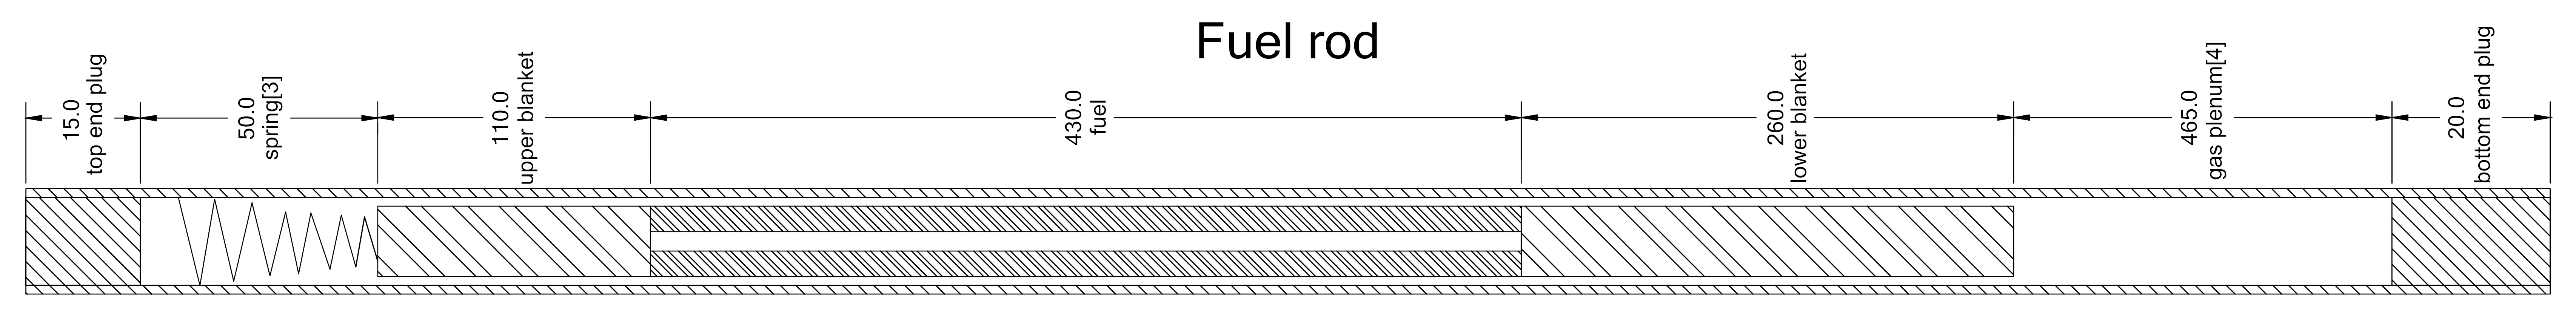

In [19]:
from IPython.display import Image
Image(filename='fuel_rod_geo.png', width=950)

In [16]:
# Bottom plug (infinitely extending to -oo)
b_plug = openmc.Cell()
b_plug.region = -lgas_bottom
b_plug.fill = ss
# Bottom gas plenum
b_gas = openmc.Cell()
b_gas.region = +lgas_bottom & -lblanket_bottom
b_gas.fill = he4
# Bottom blanket
b_blanket = openmc.Cell()
b_blanket.region = -ro_pellet & +lblanket_bottom & -fuel_bottom
b_blanket.fill = uo2_blanket
b_blanket_gap = openmc.Cell()
b_blanket_gap.region = +ro_pellet & +lblanket_bottom & -fuel_bottom
b_blanket_gap.fill = he4
# MOX fuel
fuel = openmc.Cell()
fuel.region = +fuel_bottom & -fuel_top
fuel.fill = uo2_stack
# Top blanket
t_blanket = openmc.Cell()
t_blanket.region = -ro_pellet & +fuel_top & -ublanket_top
t_blanket.fill = uo2_blanket
t_blanket_gap = openmc.Cell()
t_blanket_gap.region = +ro_pellet & +fuel_top & -ublanket_top 
t_blanket_gap.fill = he4
# Top gas plenum
t_gas = openmc.Cell()
t_gas.region = +ublanket_top & -ugas_top
t_gas.fill = he4
# Top plug (infinitely extending to +oo)
t_plug = openmc.Cell()
t_plug.region = +ugas_top
t_plug.fill = ss

Let's now create a universe collecting all parts which are inside the fuel rod clad.

In [17]:
# Universe containing all the fuel rod components
u_inrod = openmc.Universe()
u_inrod.add_cells([b_plug,b_gas,b_blanket,b_blanket_gap,fuel,t_blanket,t_blanket_gap,t_gas,t_plug])
u_inrod.plot(basis='xy',origin=(0.,0.,0.),pixels=(300, 300),color_by='material')

RuntimeError: ERROR: Particle -1 left lattice 2, but it has no outer definition. Particle -1 left lattice 2, but it has no outer definition. ERROR: ERROR: Particle -1 left lattice 2, but it has no outer definition. ERROR: Particle -1 left lattice 2, but it has no outer definition. Particle -1 left lattice 2, but it has no outer definition. ERROR: Particle -1 left lattice 2, but it has no outer definition. ERROR: ERROR: Particle -1 left lattice 2, but it has no outer definition. Particle -1 left lattice 2, but it has no outer definition. ERROR: Particle -1 left lattice 2, but it has no outer definition. ERROR: Particle -1 left lattice 2, but it has no outer definition.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 fatal flex scanner internal error--end of buffer missed fatal flex scanner internal error--end of buffer missed fatal flex scanner internal error--end of buffer missed fatal flex scanner internal error--end of buffer missed -------------------------------------------------------------------------- MPI_ABORT was invoked on rank 0 in communicator MPI_COMM_WORLD Proc: [[27594,0],0] Errorcode: -1 NOTE: invoking MPI_ABORT causes Open MPI to kill all MPI processes. You may or may not see output from other processes, depending on exactly when Open MPI kills them. -------------------------------------------------------------------------- fatal flex scanner internal error--end of buffer missed       [1742378226.524634] [ZioFester2:4200 :0] spinlock.c:29 UCX WARN ucs_recursive_spinlock_destroy() failed: busy [1742378226.524662] [ZioFester2:4200 :2] debug.c:1300 UCX WARN ucs_debug_disable_signal: signal 1 was not set in ucs -------------------------------------------------------------------------- MPI_ABORT was invoked on rank 0 in communicator MPI_COMM_WORLD Proc: [[27594,0],0] Errorcode: -1 NOTE: invoking MPI_ABORT causes Open MPI to kill all MPI processes. You may or may not see output from other processes, depending on exactly when Open MPI kills them. --------------------------------------------------------------------------

It is now the time to fill the fuel rod clad with the inner regions.

In [22]:
# Fuel rod 
fuel_rod = openmc.Cell()
fuel_rod.region = -ro_gap & +rod_bottom & -rod_top
fuel_rod.fill = u_inrod
# Fue rod clad
fuel_clad = openmc.Cell()
fuel_clad.region = +ro_gap & -ro_clad & +rod_bottom & -rod_top
fuel_clad.fill = ss
# Coolant
cell_coolant = openmc.Cell()
cell_coolant.region = +ro_clad & -hex_cell & +rod_bottom & -rod_top
cell_coolant.fill = sodium

In [24]:
fuel_universe = openmc.Universe()
fuel_universe.add_cells([fuel_rod,fuel_clad,cell_coolant])

<AxesSubplot:xlabel='x [cm]', ylabel='y [cm]'>

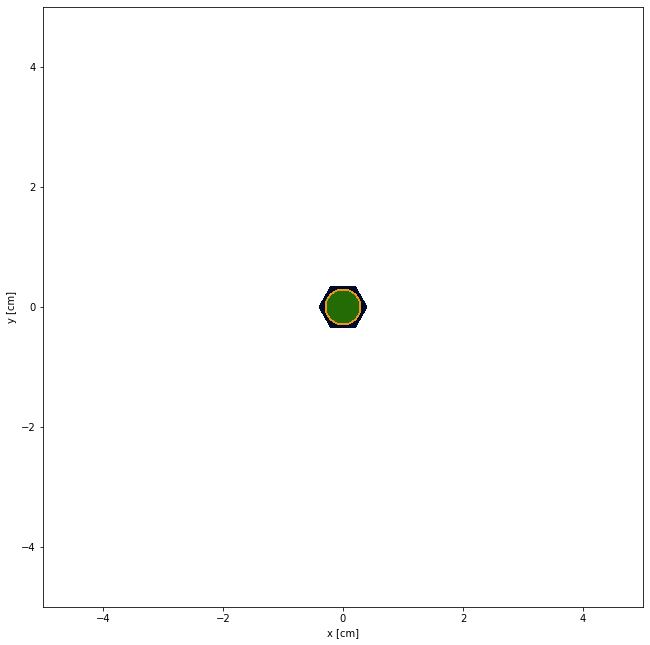

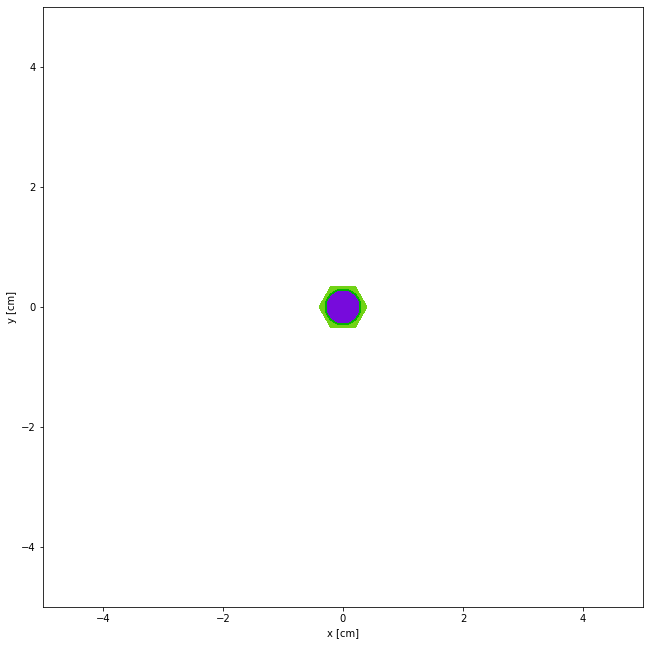

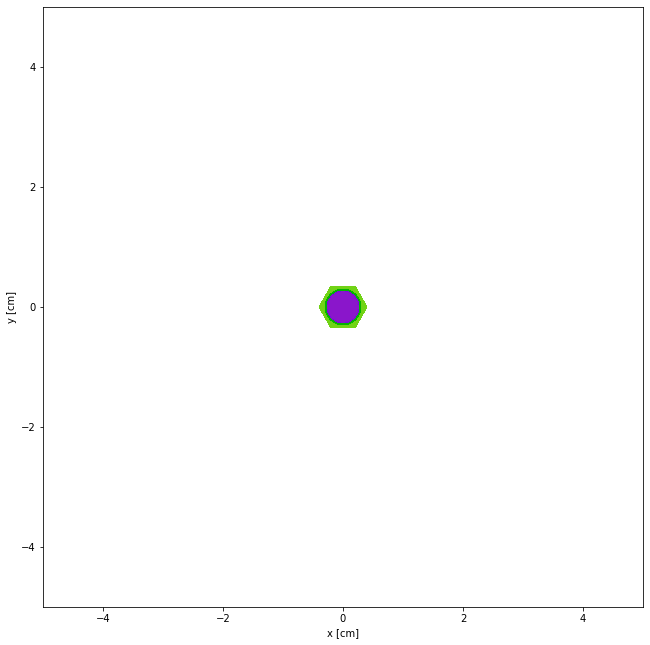

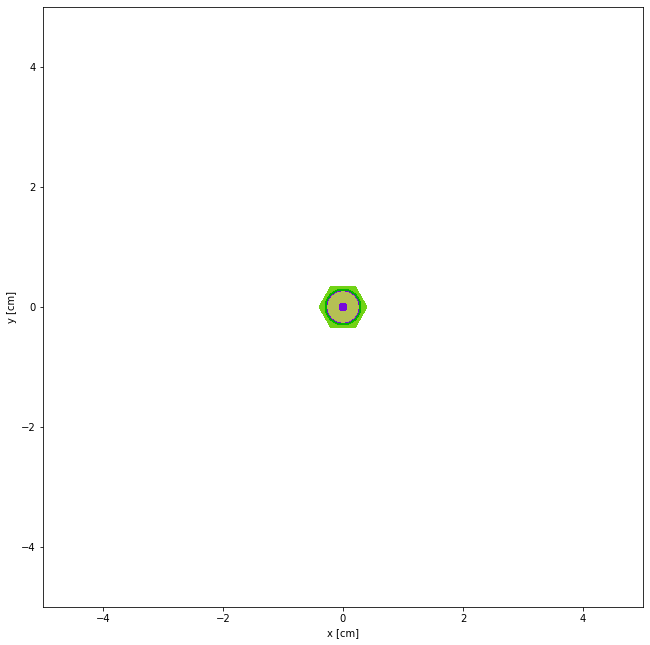

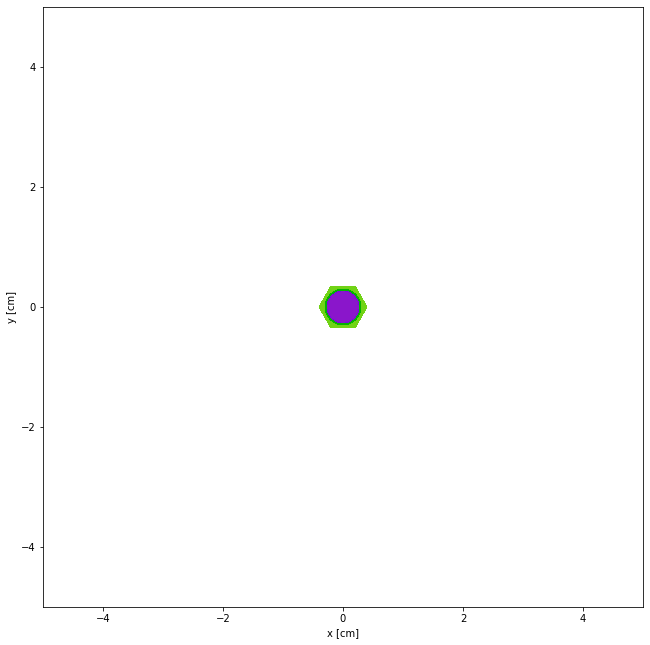

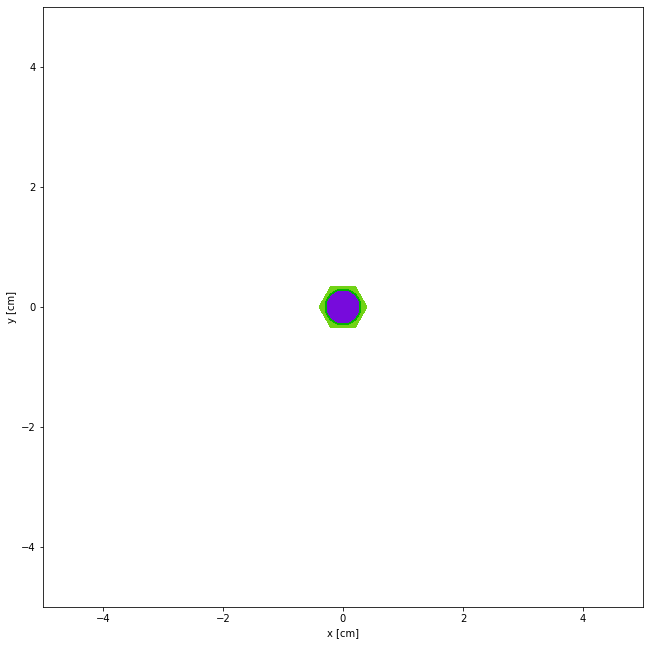

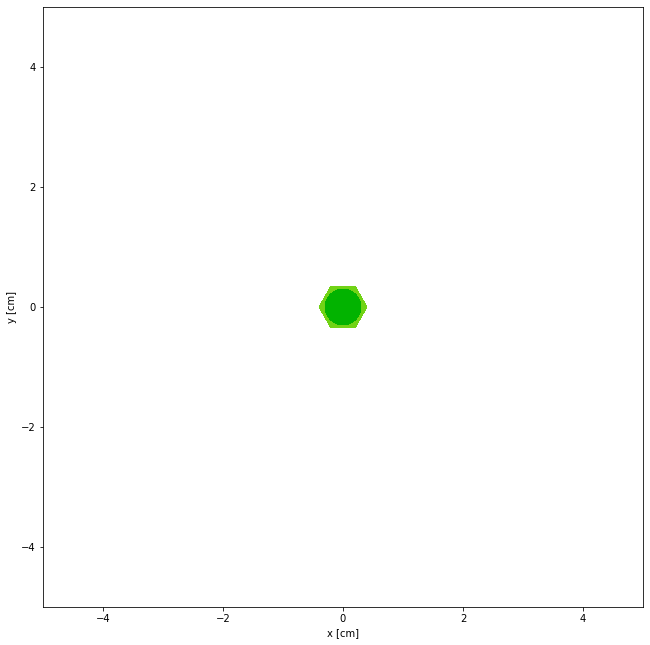

In [28]:
fuel_universe.plot(basis='xy',origin=(0.,0.,38.25),pixels=(600, 600),color_by='cell')
fuel_universe.plot(basis='xy',origin=(0.,0.,35.),pixels=(600, 600),color_by='material')
fuel_universe.plot(basis='xy',origin=(0.,0.,27.),pixels=(600, 600),color_by='material')
fuel_universe.plot(basis='xy',origin=(0.,0.,0.),pixels=(600, 600),color_by='material')
fuel_universe.plot(basis='xy',origin=(0.,0.,-34.5),pixels=(600, 600),color_by='material')
fuel_universe.plot(basis='xy',origin=(0.,0.,-70.75),pixels=(600, 600),color_by='material')
fuel_universe.plot(basis='xy',origin=(0.,0.,-95.),pixels=(600, 600),color_by='material')

The geometry is now completed and can be exported in the `geometry.xml` file.

In [29]:
geometry = openmc.Geometry(fuel_universe)
geometry.export_to_xml()
!cat  geometry.xml

<?xml version='1.0' encoding='UTF-8'?>
<geometry>
  <cell id="1" material="4" region="-1 6 -5" universe="1"/>
  <cell id="2" material="3" region="1 -2 6 -5 -7 -8" universe="1"/>
  <cell id="3" material="4" region="(2 | 7 | 8) 6 -5" universe="1"/>
  <cell id="4" material="5" region="-13" universe="3"/>
  <cell id="5" material="4" region="13 -11" universe="3"/>
  <cell id="6" material="7" region="-2 11 -9" universe="3"/>
  <cell id="7" material="4" region="2 11 -9" universe="3"/>
  <cell fill="2" id="8" region="9 -10" universe="3"/>
  <cell id="9" material="7" region="-2 10 -12" universe="3"/>
  <cell id="10" material="4" region="2 10 -12" universe="3"/>
  <cell id="11" material="4" region="12 -14" universe="3"/>
  <cell id="12" material="5" region="14" universe="3"/>
  <cell fill="3" id="13" region="-3 16 -15" universe="4"/>
  <cell id="14" material="5" region="3 -4 16 -15" universe="4"/>
  <cell id="15" material="6" region="4 -17 18 -19 -22 20 21 16 -15" universe="4"/>
  <lattice id="2

# Settings
To calculate the infinite multiplication constant of the above fuel cell it is necessary to define some settings.

In [30]:
source_point = openmc.stats.Point(xyz=(0.0,0.0,0.0))
source_energy = openmc.stats.Watt(a=988000.0, b=2.249e-06)
source = openmc.Source(space=source_point,energy=source_energy)
#
sim_settings = openmc.Settings()
sim_settings.run_mode = 'eigenvalue'
sim_settings.particles = 1000
sim_settings.generations_per_batch = 5
sim_settings.inactive = 25
sim_settings.batches = 100

/home/valerio/.local/lib/python3.10/site-packages/openmc/source.py:390: FutureWarning: This class is deprecated in favor of 'IndependentSource'
  warnings.warn("This class is deprecated in favor of 'IndependentSource'", FutureWarning)


Let's export the settings in the `settings.xml` file.

In [31]:
sim_settings.export_to_xml()

# Geometry plot

In [32]:
plot = openmc.Plot()
plot.filename = 'fuel_rod'
plot.width = (7.5,137.0)
plot.pixels = (750,13700)
plot.color_by = 'material'
plot.basis = 'xz'
plot.origin = (0.0,0.0,-28.5)
plot.colors = {mox: 'black', uo2_blanket: 'grey', he4: 'yellow', ss: 'blue', sodium: 'red'}

With our plot created, we need to add it to a `Plots` collection which can be exported to XML.

In [33]:
plots = openmc.Plots([plot])
plots.export_to_xml()
!cat plots.xml

<?xml version='1.0' encoding='UTF-8'?>
<plots>
  <plot basis="xz" color_by="material" filename="fuel_rod" id="30" type="slice">
    <pixels>750 13700</pixels>
    <origin>0.0 0.0 -28.5</origin>
    <width>7.5 137.0</width>
    <color id="3" rgb="0 0 0"/>
    <color id="4" rgb="255 255 0"/>
    <color id="5" rgb="0 0 255"/>
    <color id="6" rgb="255 0 0"/>
    <color id="7" rgb="128 128 128"/>
  </plot>
</plots>


Now we can run OpenMC in plotting mode by calling `openmc --plot`.

In [34]:
openmc.plot_geometry()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

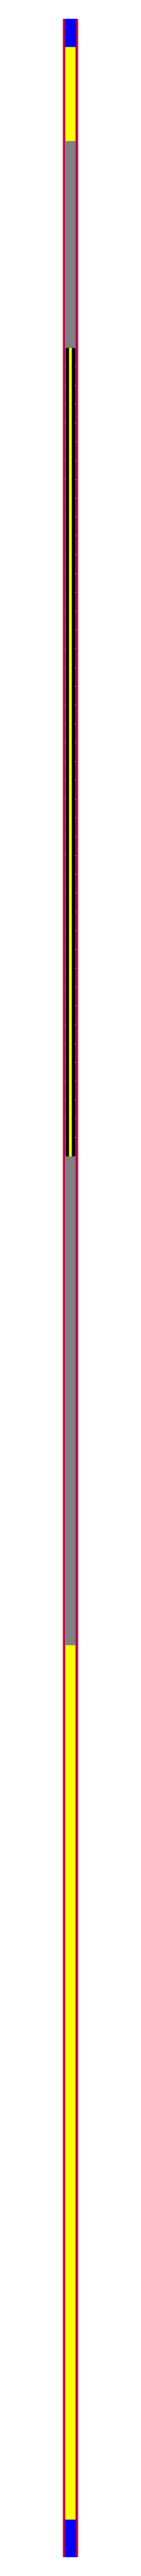

In [35]:
#!convert fuel_rod.ppm fuel_rod.png
plot.to_ipython_image()

# OpenMC simulation
We are now ready to start the simulation to check what's the expected infinite multiplication constant, k$_\infty$.

In [36]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

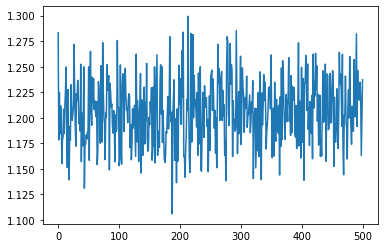

In [37]:
st_file = openmc.StatePoint('statepoint.100.h5')
plt.plot(st_file.k_generation)